### Pt. 4 
##### Neural Network pipeline for Big G's automotive
 * This notebook is specifically for a neural network.  Given the df's size (500k, and 243 columns) it's probably best run in google colab...

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

In [2]:
#read df in
#For some reason columns (7,12,15,16,18,19,20,21,22,23,25,27,28) have mixed types. Same warning as in pt. 2. to see warning, delete low_memory=False
big_g_df=pd.read_csv('../data/big_g_pipeline_ready.csv', low_memory=False)

In [3]:
big_g_df.drop(columns=['Unnamed: 0',
                      ])

,RecordID,EventTimeStamp,spn,fmi,active,activeTransitionCount,EquipmentID,Latitude,Longitude,LocationTimeStamp,...,5862_3,5862_4,6773_16,6780_3,6802_31,7321_4,7323_4,7854_2,7854_3,7854_4
0,1,2015-02-21 10:47:13,111,17,True,2,1439,38.86,-84.63,2015-02-21 11:34:25,...,False,False,False,False,False,False,False,False,False,False
1,6,2015-02-21 11:40:22,111,17,True,1,1417,33.04,-96.18,2015-02-21 11:40:59,...,False,False,False,False,False,False,False,False,False,False
2,7,2015-02-21 11:40:52,111,17,True,2,1597,36.90,-86.44,2015-02-21 11:41:29,...,False,False,False,False,False,False,False,False,False,False
3,11,2015-02-21 11:42:19,111,17,True,1,1582,40.16,-80.15,2015-02-21 11:42:55,...,False,False,False,False,False,False,False,False,False,False
4,15,2015-02-21 11:14:38,1067,2,True,127,309,36.18,-86.70,2015-02-21 11:44:52,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
507337,1248448,2020-03-06 13:12:43,96,3,True,126,1936,30.38,-81.74,2020-03-06 13:29:33,...,False,False,False,False,False,False,False,False,False,False
507338,1248452,2020-03-06 13:42:48,111,18,True,93,1886,39.02,-77.03,2020-03-06 13:43:24,...,False,False,False,False,False,False,False,False,False,False
507339,1248455,2020-03-06 14:04:23,1569,31,True,5,1994,34.39,-79.46,2020-03-06 14:04:59,...,False,False,False,False,False,False,False,False,False,False
507340,1248456,2020-03-06 14:13:38,3216,10,True,1,1850,34.43,-84.92,2020-03-06 14:14:14,...,False,False,False,False,False,False,False,False,False,False


In [4]:
pd.set_option('display.max_columns', None)

In [5]:
big_g_df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 507342 entries, 0 to 507341
Data columns (total 243 columns):
 #    Column                     Dtype  
---   ------                     -----  
 0    Unnamed: 0                 int64  
 1    RecordID                   int64  
 2    EventTimeStamp             object 
 3    spn                        int64  
 4    fmi                        int64  
 5    active                     bool   
 6    activeTransitionCount      int64  
 7    EquipmentID                object 
 8    Latitude                   float64
 9    Longitude                  float64
 10   LocationTimeStamp          object 
 11   time_of_day                object 
 12   BarometricPressure         object 
 13   CruiseControlActive        bool   
 14   CruiseControlSetSpeed      float64
 15   DistanceLtd                object 
 16   EngineCoolantTemperature   object 
 17   EngineLoad                 int64  
 18   EngineOilPressure          object 
 19   EngineOilTemperature 

In [6]:
print(list(big_g_df.columns))

['Unnamed: 0', 'RecordID', 'EventTimeStamp', 'spn', 'fmi', 'active', 'activeTransitionCount', 'EquipmentID', 'Latitude', 'Longitude', 'LocationTimeStamp', 'time_of_day', 'BarometricPressure', 'CruiseControlActive', 'CruiseControlSetSpeed', 'DistanceLtd', 'EngineCoolantTemperature', 'EngineLoad', 'EngineOilPressure', 'EngineOilTemperature', 'EngineRpm', 'EngineTimeLtd', 'FuelLtd', 'FuelRate', 'IgnStatus', 'IntakeManifoldTemperature', 'LampStatus', 'Speed', 'TurboBoostPressure', 'geometry', 'distance', 'spn_combined', '1761_1', '1761_10', '1761_11', '1761_17', '1761_18', '1761_19', '1761_3', '1761_4', '1761_9', '3031_18', '3031_2', '3031_3', '3031_4', '3031_9', '3216_10', '3216_11', '3216_16', '3216_2', '3216_20', '3216_21', '3216_3', '3216_4', '3216_9', '3217_2', '3218_2', '3222_5', '3226_10', '3226_11', '3226_16', '3226_2', '3226_20', '3226_21', '3226_4', '3226_9', '3227_10', '3227_21', '3228_2', '3242_0', '3242_15', '3242_16', '3242_3', '3242_4', '3246_0', '3246_15', '3246_16', '3246_

In [21]:
features = [ 'distance', '1761_1', '1761_10', '1761_11', '1761_17', '1761_18', '1761_19', '1761_3', '1761_4', '1761_9', '3031_18', '3031_2', '3031_3', 
            '3031_4', '3031_9', '3216_10', '3216_11', '3216_16', '3216_2', '3216_20', '3216_21', '3216_3', '3216_4', '3216_9', '3217_2', 
            '3218_2', '3222_5', '3226_10', '3226_11', '3226_16', '3226_2', '3226_20', '3226_21', '3226_4', '3226_9', '3227_10', '3227_21', 
            '3228_2', '3242_0', '3242_15', '3242_16', '3242_3', '3242_4', '3246_0', '3246_15', '3246_16', '3246_2', '3246_3', '3246_4', 
            '3251_0', '3251_10', '3251_15', '3251_16', '3251_2', '3251_3', '3251_4', '3360_11', '3360_12', '3360_19', '3360_2', '3360_9', 
            '3361_12', '3361_2', '3361_3', '3361_4', '3361_5', '3362_31', '3362_7', '3363_16', '3363_3', '3363_4', '3363_5', '3363_7', 
            '3364_10', '3364_11', '3364_18', '3364_3', '3364_9', '3480_17', '3480_2', '3480_3', '3480_4', '3482_2', '3482_3', '3482_7', 
            '3490_3', '3490_4', '3490_7', '3515_10', '3521_18', '3556_18', '3556_2', '3556_5', '3610_2', '3610_3', '3610_4', '3703_31', 
            '3720_15', '3936_14', '3936_15', '3936_16', '3936_7', '4094_18', '4094_31', '4096_31', '4331_16', '4331_18', '4334_16', 
            '4334_18', '4334_2', '4334_3', '4334_4', '4339_7', '4340_3', '4340_4', '4340_5', '4342_3', '4342_4', '4342_5', '4344_3', '4344_4',
            '4344_5', '4346_5', '4360_0', '4360_10', '4360_16', '4360_3', '4360_4', '4363_0', '4363_10', '4363_16', '4363_2', '4363_3', '4363_4',
            '4364_18', '4364_31', '4375_2', '4375_4', '4376_3', '4376_4', '4376_5', '4376_7', '4765_16', '4765_2', '4765_3', '4765_4', '4766_15',
            '4766_3', '4792_14', '4794_31', '4795_31', '4796_31', '5024_10', '5031_10', '520953_4', '521032_14', '5246_16', '5298_17',
            '5298_18', '5319_31', '5392_31', '5394_3', '5394_4', '5394_5', '5394_7', '5397_31', '5491_3', '5491_4', '5491_5', '5491_7', '5569_2',
            '5742_11', '5742_12', '5742_16', '5742_3', '5742_4', '5742_9', '5743_11', '5743_12', '5743_3', '5743_4', '5743_9', '5745_18', '5745_3',
            '5745_4', '5746_4', '5835_21', '5835_3', '5835_4', '5835_9', '5848_12', '5848_13', '5848_19', '5848_4', '5848_9', '5851_18', '5851_2',
            '5853_10', '5862_0', '5862_16', '5862_2', '5862_3', '5862_4', '6773_16', '6780_3', '6802_31', '7321_4', '7323_4', '7854_2', '7854_3',
            '7854_4']

X = big_g_df[features]
y = big_g_df['5246_0']

# Encode the target variable
le = LabelEncoder().fit(y)
y = le.transform(y)

# Perform a train/test split first
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, random_state = 321)

# Then scale the predictors
scaler = StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [22]:
#Start with a sequential model
model = tf.keras.Sequential()

# Then add Dense layer
# See https://www.tensorflow.org/api_docs/python/tf/keras/layers/Dense
model.add(
    tf.keras.layers.Dense(units = 2,
                          input_shape = (len(features),),
                          activation = 'tanh'
                          )
)

# And end with another Dense layer as the output layer.
# It needs one node per target category
# We'll use softmax activation (since this is a multiclass problem)
# https://en.wikipedia.org/wiki/Softmax_function
model.add(tf.keras.layers.Dense(3, activation = 'softmax'))

# Finally, compile the model
# We need to use sparse categorical crossentropy since our target is encoded as integers
# We can also give one or more metrics we want to track as we train out model.
model.compile('adam', 'sparse_categorical_crossentropy', metrics=['accuracy'])

In [23]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 2)                 424       
                                                                 
 dense_6 (Dense)             (None, 3)                 9         
                                                                 
Total params: 433 (1.69 KB)
Trainable params: 433 (1.69 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [24]:
history = model.fit(X_train, y_train, epochs = 10)

Epoch 1/10
11891/11891 [==============================] - 34s 3ms/step - loss: 0.0467 - accuracy: 0.9918
Epoch 2/10
11891/11891 [==============================] - 33s 3ms/step - loss: 0.0042 - accuracy: 0.9995
Epoch 3/10
11891/11891 [==============================] - 35s 3ms/step - loss: 0.0041 - accuracy: 0.9995
Epoch 4/10
11891/11891 [==============================] - 35s 3ms/step - loss: 0.0041 - accuracy: 0.9995
Epoch 5/10
11891/11891 [==============================] - 33s 3ms/step - loss: 0.0041 - accuracy: 0.9995
Epoch 6/10
11891/11891 [==============================] - 35s 3ms/step - loss: 0.0041 - accuracy: 0.9995
Epoch 7/10
11891/11891 [==============================] - 33s 3ms/step - loss: 0.0041 - accuracy: 0.9995
Epoch 8/10
11891/11891 [==============================] - 34s 3ms/step - loss: 0.0041 - accuracy: 0.9995
Epoch 9/10
11891/11891 [==============================] - 33s 3ms/step - loss: 0.0041 - accuracy: 0.9995
Epoch 10/10
11891/11891 [==============================

In [25]:
le.classes_

array([False,  True])

In [26]:
model.predict(X_test)

3964/3964 [==============================] - 9s 2ms/step


array([[9.9958295e-01, 4.1700239e-04, 1.9389996e-09],
       [9.9947971e-01, 5.2028091e-04, 4.1255332e-10],
       [9.9950874e-01, 4.9128785e-04, 6.1053734e-10],
       ...,
       [9.9970633e-01, 2.9360145e-04, 2.2794545e-08],
       [9.9951410e-01, 4.8587454e-04, 6.5948352e-10],
       [9.9953020e-01, 4.6977872e-04, 8.3483870e-10]], dtype=float32)

In [27]:
y_pred = np.argmax(model.predict(X_test), axis = 1)
y_pred

3964/3964 [==============================] - 10s 2ms/step


array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [28]:
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    126776
           1       0.00      0.00      0.00        60

    accuracy                           1.00    126836
   macro avg       0.50      0.50      0.50    126836
weighted avg       1.00      1.00      1.00    126836

[[126776      0]
 [    60      0]]


C:\Users\micha\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\micha\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\micha\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


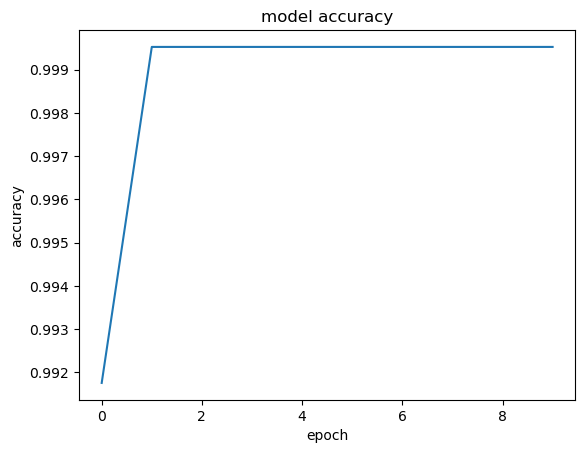

In [29]:
plt.plot(history.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch');
plt.savefig('ta_da!.png')

In [17]:
model = tf.keras.Sequential()
model.add(
    tf.keras.layers.Dense(units = 100,
                          input_shape = (len(features),),
                          activation = 'tanh'
                          )
)
model.add(
    tf.keras.layers.Dense(units = 15,
                          activation = 'tanh'
                          )
)
model.add(tf.keras.layers.Dense(3, activation = 'softmax'))

model.compile('adam', 'sparse_categorical_crossentropy', metrics=['accuracy'])

In [18]:
history = model.fit(X_train, y_train, epochs = 10, validation_split = 0.2)

Epoch 1/10
9513/9513 [==============================] - 21s 2ms/step - loss: 0.0144 - accuracy: 0.9976 - val_loss: 0.0053 - val_accuracy: 0.9994
Epoch 2/10
9513/9513 [==============================] - 21s 2ms/step - loss: 0.0040 - accuracy: 0.9995 - val_loss: 0.0053 - val_accuracy: 0.9994
Epoch 3/10
9513/9513 [==============================] - 21s 2ms/step - loss: 0.0039 - accuracy: 0.9996 - val_loss: 0.0052 - val_accuracy: 0.9994
Epoch 4/10
9513/9513 [==============================] - 20s 2ms/step - loss: 0.0038 - accuracy: 0.9996 - val_loss: 0.0054 - val_accuracy: 0.9994
Epoch 5/10
9513/9513 [==============================] - 21s 2ms/step - loss: 0.0038 - accuracy: 0.9996 - val_loss: 0.0052 - val_accuracy: 0.9994
Epoch 6/10
9513/9513 [==============================] - 25s 3ms/step - loss: 0.0038 - accuracy: 0.9996 - val_loss: 0.0052 - val_accuracy: 0.9994
Epoch 7/10
9513/9513 [==============================] - 28s 3ms/step - loss: 0.0038 - accuracy: 0.9996 - val_loss: 0.0052 - val_ac

In [ ]:
plt.plot(history.history['accuracy'], label = 'train')
plt.plot(history.history['val_accuracy'], label = 'validation')
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend();